In [156]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

[ WARN:0@3196.648] global cap_gstreamer.cpp:1173 isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


(960, 1280, 3)


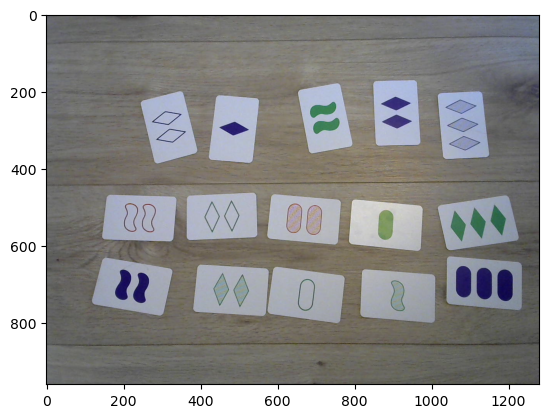

In [157]:


# Initialize webcam (0 = default camera)
cam = cv2.VideoCapture(0)

# Capture one frame
cv2.waitKey(1000)  # Wait for the camera to warm up
ret, frame = cam.read()

if ret:
    # Convert BGR to RGB for displaying with matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_rgb = np.array(frame_rgb)
    # Display the captured image
    plt.imshow(frame_rgb)
    # plt.axis('off')  # Hide axis
    # plt.show()
    print(frame_rgb.shape)

else:
    print("Failed to capture image.")
cam.release()

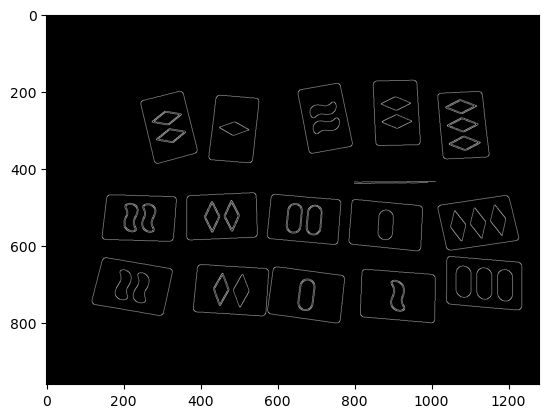

In [158]:
# Aplly grayscale conversion
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Gaussian Blur to reduce noise and improve edge detection
blured = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blured, 100, 200)
# Display the edges
plt.imshow(edges, cmap='gray')
# plt.axis('off')  # Hide axis
# plt.show()


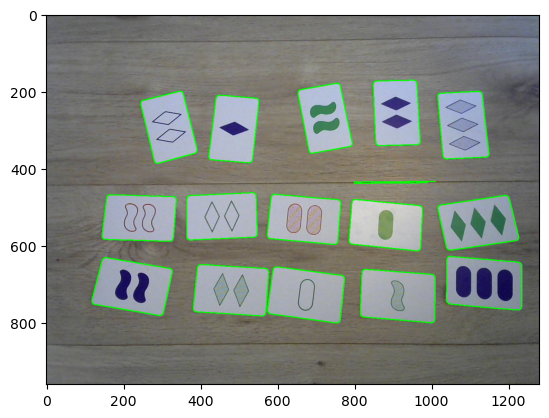

In [159]:
# find the contours from the edged image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# draw the contours on the original image
contour_image = frame.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
# Display the image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))

In [160]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [10,  8, -1, -1],
        [11,  9, -1, -1],
        [12, 10, -1, -1],
        [13, 11, -1, -1],
        [14, 12, -1, -1],
        [15, 13, -1, -1],
        [16, 14, -1, -1],
        [-1, 15, -1, -1]]], dtype=int32)

In [161]:
# Print the hierarchy and its index
for i in range(len(hierarchy[0])):
    print(f"Contour {i}: {hierarchy[0][i]}")
#  Hierarchy format:
# [next, previous, first child, parent] and the corresponing integer is the index of the contour in the contours list.

Contour 0: [ 1 -1 -1 -1]
Contour 1: [ 2  0 -1 -1]
Contour 2: [ 3  1 -1 -1]
Contour 3: [ 4  2 -1 -1]
Contour 4: [ 5  3 -1 -1]
Contour 5: [ 6  4 -1 -1]
Contour 6: [ 7  5 -1 -1]
Contour 7: [ 8  6 -1 -1]
Contour 8: [ 9  7 -1 -1]
Contour 9: [10  8 -1 -1]
Contour 10: [11  9 -1 -1]
Contour 11: [12 10 -1 -1]
Contour 12: [13 11 -1 -1]
Contour 13: [14 12 -1 -1]
Contour 14: [15 13 -1 -1]
Contour 15: [16 14 -1 -1]
Contour 16: [-1 15 -1 -1]


In [162]:
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])
    # print area of each contour
    print(i, area)

0 23891.5
1 23316.5
2 23011.0
3 23219.0
4 24161.5
5 21673.0
6 22515.5
7 21226.5
8 21194.5
9 20916.0
10 0.0
11 0.0
12 18985.0
13 20098.5
14 19040.0
15 18917.5
16 19179.0


In [163]:
# mean value of all areas
mean_area = np.mean([cv2.contourArea(c) for c in contours])
std_area = np.std([cv2.contourArea(c) for c in contours])
print("Number of contours detected:", len(contours))
print("Mean area of contours:", mean_area)
print("Standard deviation of areas:", std_area)

Number of contours detected: 17
Mean area of contours: 18902.647058823528
Standard deviation of areas: 7108.909992903077


In [164]:
# Delete all areas smaller than the std
filtered_contours = [c for c in contours if cv2.contourArea(c) >= std_area]
print("Number of contours after filtering:", len(filtered_contours))

Number of contours after filtering: 15


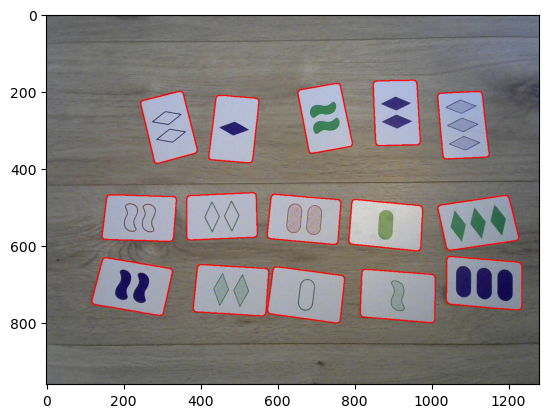

In [165]:
# Draw filtered contours
filtered_contour_image = frame.copy()
cv2.drawContours(filtered_contour_image, filtered_contours, -1, (0, 0, 255), 2)
# Display the image with filtered contours
plt.imshow(cv2.cvtColor(filtered_contour_image, cv2.COLOR_BGR2RGB))


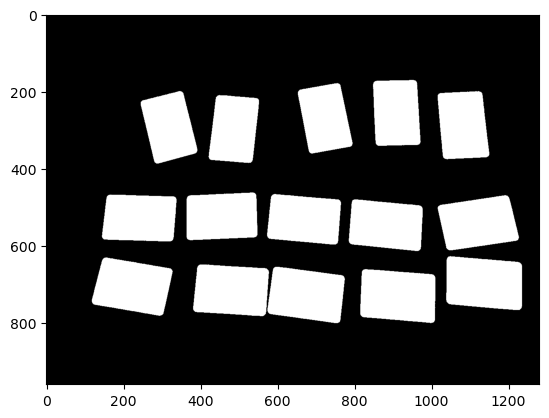

In [166]:
# Make a mask from the filtered contours
mask = np.zeros_like(gray)
cv2.drawContours(mask, filtered_contours, -1, (255), thickness=cv2.FILLED)
# Display the mask
plt.imshow(mask, cmap='gray')

(177, 134, 3)


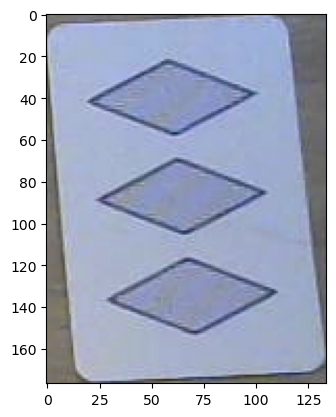

In [167]:
# Zoom on the first detected contour
if filtered_contours:
    x, y, w, h = cv2.boundingRect(filtered_contours[11])
    zoomed_image = frame[y:y+h, x:x+w]
    plt.imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))
    # plt.axis('off')  # Hide axis
    # plt.show()
    print(zoomed_image.shape)
else:
    print("No contours detected after filtering.")

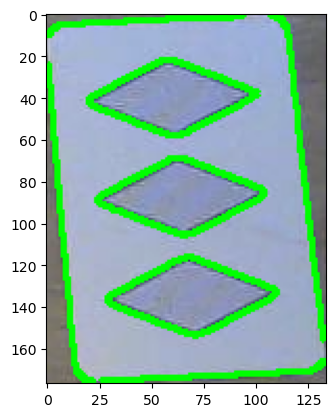

In [183]:
# canny filter on the zoomed image
gray_zoomed = cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2GRAY)
blured_zoomed = cv2.GaussianBlur(gray_zoomed, (5, 5), 0)
edges_zoomed = cv2.Canny(blured_zoomed, 100, 200)
# find the contours from the zoomed image
contours_zoomed, hierarchy = cv2.findContours(edges_zoomed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# draw the contours on the original image
contour_image_zoomed = zoomed_image.copy()
# # change the color for each contour
# for i in range(len(contours_zoomed)):
#     color = (int(255 * i / len(contours_zoomed)), int(255 * (len(contours_zoomed) - i) / len(contours_zoomed)), 0)
#     cv2.drawContours(contour_image_zoomed, contours_zoomed, i, color, 2)
cv2.drawContours(contour_image_zoomed, contours_zoomed, -1, (0, 255, 0), 2)
# Display the image with contours
plt.imshow(cv2.cvtColor(contour_image_zoomed, cv2.COLOR_BGR2RGB))

In [184]:
print(len(contours_zoomed))

7


In [185]:
hierarchy
#  Hierarchy format:
# [next, previous, first child, parent] and the corresponing integer is the index of the contour in the contours list.

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [-1,  5, -1, -1]]], dtype=int32)

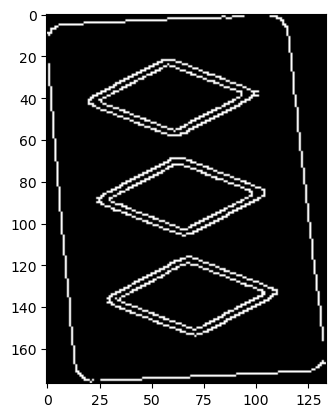

In [179]:
# show canny edges on zoomed image
plt.imshow(edges_zoomed, cmap='gray')

In [187]:
for i in range(len(contours_zoomed)):
    area = cv2.contourArea(contours_zoomed[i])
    # print area of each contour
    print(i, area)

# mean value of all areas
mean_area_zoomed = np.mean([cv2.contourArea(c) for c in contours_zoomed])
std_area_zoomed = np.std([cv2.contourArea(c) for c in contours_zoomed])
print("Number of contours detected in zoomed image:", len(contours_zoomed))
print("Mean area of contours in zoomed image:", mean_area_zoomed)
print("Standard deviation of areas in zoomed image:", std_area_zoomed)

0 3.0
1 1692.0
2 1661.5
3 4.5
4 1638.0
5 4.5
6 3.0
Number of contours detected in zoomed image: 7
Mean area of contours in zoomed image: 715.2142857142857
Standard deviation of areas in zoomed image: 821.6558567543808


In [188]:
# Delete all areas smaller than the std in zoomed image
filtered_contours_zoomed = [c for c in contours_zoomed if cv2.contourArea(c) >= std_area_zoomed]
print("Number of contours after filtering in zoomed image:", len(filtered_contours_zoomed))


Number of contours after filtering in zoomed image: 3


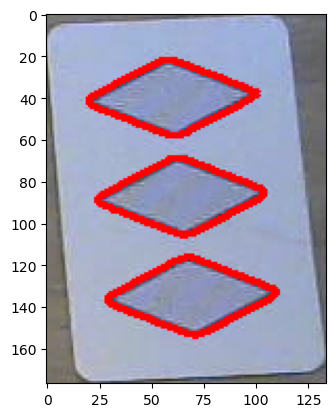

In [189]:
# show the filtered contours on zoomed image
filtered_contour_image_zoomed = zoomed_image.copy()
cv2.drawContours(filtered_contour_image_zoomed, filtered_contours_zoomed, -1, (0, 0, 255), 2)
plt.imshow(cv2.cvtColor(filtered_contour_image_zoomed, cv2.COLOR_BGR2RGB))